### Test LinUCB, ThresholdBandit and GreedyBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
#alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
#betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))

alphas = np.array([[0, 2]]).T
betas = np.array([1, 0])
N = 3000
M = 100
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [4]:
linucb = LinUCB(generator)

linucb_pred = np.zeros((M, 2, N))
linucb_upper = np.zeros((M, 2, N))
linucb_lower = np.zeros((M, 2, N))

regret_ucb = np.zeros(N)
N = 3000
for i in range(N):
    (ctx, arm_idx, obs, reg) = linucb.step()
    p0, u0, l0 = linucb.pred_arm(0, M)
    p1, u1, l1 = linucb.pred_arm(1, M)
    linucb_pred[:,0,i] = p0
    linucb_upper[:,0,i] = u0
    linucb_lower[:,0,i] = l0
    linucb_pred[:,1,i] = p1
    linucb_upper[:,1,i] = u1
    linucb_lower[:,1,i] = l1    
    regret_ucb[i] = reg
    #print np.sqrt(np.log(np.linalg.det(linucb.V)))
    #arm = linucb.arms([1, 0.5], arm_idx)
    #pred = linucb.beta(linucb.V)*np.sqrt(np.dot(arm.T, np.dot(np.linalg.inv(linucb.V), arm)))
    #print pred
    
theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.99773991]
 [ 0.02960453]
 [ 0.02744896]
 [ 1.9625731 ]]


In [5]:
#Make plots of LinUCB confidence interval
xvals = np.linspace(-0.5, 1.5, M)
preds = np.zeros((M, 2))
preds_up = np.zeros((M, 2))
preds_low = np.zeros((M, 2))
for arm_idx in range(2):
    for i in range(M):
        preds[i,arm_idx] = linucb.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower([1, xvals[i]], arm_idx)

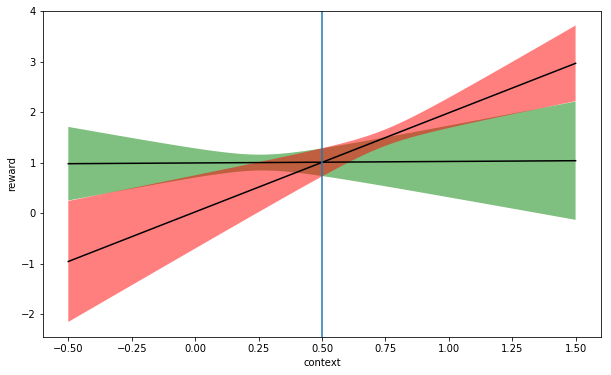

In [6]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

In [7]:
#Do confidence bounds decrease with iterations?

### Threshold bandit

In [8]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
#print thresholdbandit.threshold

N = 3000

thresh_pred = np.zeros((M, 2, N))
thresh_upper = np.zeros((M, 2, N))
thresh_lower = np.zeros((M, 2, N))

#Record if the policy changes

regret_thr = np.zeros((N))
for i in range(N):
    (ctx, arm_idx, obs, reg) = thresholdbandit.step()
    regret_thr[i] = reg
    p0, u0, l0 = thresholdbandit.pred_arm(0, M)
    p1, u1, l1 = thresholdbandit.pred_arm(1, M)
    thresh_pred[:,0,i] = p0
    thresh_upper[:,0,i] = u0
    thresh_lower[:,0,i] = l0
    thresh_pred[:,1,i] = p1
    thresh_upper[:,1,i] = u1
    thresh_lower[:,1,i] = l1
    #thr = thresholdbandit.threshold
    #lb = thresholdbandit.lower_bound
    #ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f"%(i, ctx[1], arm_idx, obs, reg))

theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

i:0,ctx:0.960588,arm:1,rew:1.927961,regret:0.000000
i:1,ctx:0.504645,arm:1,rew:1.006762,regret:0.000000
i:2,ctx:0.701736,arm:1,rew:1.522557,regret:0.000000
i:3,ctx:0.044878,arm:1,rew:0.213050,regret:0.910243
i:4,ctx:0.336868,arm:1,rew:0.639401,regret:0.326265
i:5,ctx:0.416204,arm:1,rew:0.877973,regret:0.167592
i:6,ctx:0.038037,arm:1,rew:0.055326,regret:0.923927
i:7,ctx:0.038100,arm:1,rew:-0.024009,regret:0.923799
i:8,ctx:0.302667,arm:1,rew:0.587143,regret:0.394666
i:9,ctx:0.945062,arm:1,rew:1.910694,regret:0.000000
i:10,ctx:0.640449,arm:1,rew:1.275320,regret:0.000000
i:11,ctx:0.034302,arm:1,rew:0.047787,regret:0.931397
i:12,ctx:0.100583,arm:1,rew:0.276950,regret:0.798834
i:13,ctx:0.568100,arm:1,rew:1.198779,regret:0.000000
i:14,ctx:0.646435,arm:1,rew:1.378262,regret:0.000000
i:15,ctx:0.798631,arm:1,rew:1.628317,regret:0.000000
i:16,ctx:0.041314,arm:1,rew:0.072671,regret:0.917371
i:17,ctx:0.286841,arm:1,rew:0.761420,regret:0.426317
i:18,ctx:0.261509,arm:1,rew:0.494565,regret:0.476981
i:

i:155,ctx:0.304181,arm:0,rew:1.064169,regret:0.000000
i:156,ctx:0.345583,arm:0,rew:0.875836,regret:0.000000
i:157,ctx:0.455610,arm:0,rew:1.038775,regret:0.000000
i:158,ctx:0.563581,arm:1,rew:1.189343,regret:0.000000
i:159,ctx:0.355034,arm:0,rew:1.017433,regret:0.000000
i:160,ctx:0.015872,arm:0,rew:1.036928,regret:0.000000
i:161,ctx:0.036658,arm:0,rew:1.058293,regret:0.000000
i:162,ctx:0.455413,arm:0,rew:1.046904,regret:0.000000
i:163,ctx:0.432679,arm:0,rew:1.013039,regret:0.000000
i:164,ctx:0.855818,arm:1,rew:1.593636,regret:0.000000
i:165,ctx:0.673218,arm:1,rew:1.462930,regret:0.000000
i:166,ctx:0.787731,arm:1,rew:1.504281,regret:0.000000
i:167,ctx:0.494624,arm:1,rew:0.819559,regret:0.010752
i:168,ctx:0.170227,arm:0,rew:0.893820,regret:0.000000
i:169,ctx:0.130066,arm:0,rew:0.954926,regret:0.000000
i:170,ctx:0.590593,arm:1,rew:1.195857,regret:0.000000
i:171,ctx:0.181971,arm:0,rew:1.068779,regret:0.000000
i:172,ctx:0.518433,arm:1,rew:0.769877,regret:0.000000
i:173,ctx:0.787868,arm:1,rew

i:310,ctx:0.005726,arm:0,rew:0.944679,regret:0.000000
i:311,ctx:0.158672,arm:0,rew:0.968932,regret:0.000000
i:312,ctx:0.866454,arm:1,rew:1.808716,regret:0.000000
i:313,ctx:0.881657,arm:1,rew:1.812716,regret:0.000000
i:314,ctx:0.307102,arm:0,rew:0.973303,regret:0.000000
i:315,ctx:0.538384,arm:1,rew:1.204287,regret:0.000000
i:316,ctx:0.390009,arm:0,rew:1.076283,regret:0.000000
i:317,ctx:0.596830,arm:1,rew:1.151701,regret:0.000000
i:318,ctx:0.123217,arm:0,rew:1.031704,regret:0.000000
i:319,ctx:0.912736,arm:1,rew:1.700023,regret:0.000000
i:320,ctx:0.904132,arm:1,rew:1.936084,regret:0.000000
i:321,ctx:0.084670,arm:0,rew:0.894993,regret:0.000000
i:322,ctx:0.520175,arm:1,rew:0.894503,regret:0.000000
i:323,ctx:0.174083,arm:0,rew:1.016567,regret:0.000000
i:324,ctx:0.353595,arm:0,rew:1.030215,regret:0.000000
i:325,ctx:0.588177,arm:1,rew:1.089329,regret:0.000000
i:326,ctx:0.103605,arm:0,rew:0.878994,regret:0.000000
i:327,ctx:0.678783,arm:1,rew:1.498102,regret:0.000000
i:328,ctx:0.034110,arm:0,rew

i:467,ctx:0.719750,arm:1,rew:1.388003,regret:0.000000
i:468,ctx:0.237360,arm:0,rew:1.010398,regret:0.000000
i:469,ctx:0.836822,arm:1,rew:1.729293,regret:0.000000
i:470,ctx:0.070161,arm:0,rew:1.088404,regret:0.000000
i:471,ctx:0.830643,arm:1,rew:1.712287,regret:0.000000
i:472,ctx:0.296155,arm:0,rew:0.895193,regret:0.000000
i:473,ctx:0.966663,arm:1,rew:1.985374,regret:0.000000
i:474,ctx:0.062685,arm:0,rew:1.097592,regret:0.000000
i:475,ctx:0.872196,arm:1,rew:1.723015,regret:0.000000
i:476,ctx:0.342126,arm:0,rew:1.064771,regret:0.000000
i:477,ctx:0.057249,arm:0,rew:1.095090,regret:0.000000
i:478,ctx:0.678879,arm:1,rew:1.284752,regret:0.000000
i:479,ctx:0.346265,arm:0,rew:1.046676,regret:0.000000
i:480,ctx:0.532537,arm:1,rew:0.972029,regret:0.000000
i:481,ctx:0.445861,arm:0,rew:0.858258,regret:0.000000
i:482,ctx:0.252174,arm:0,rew:0.874402,regret:0.000000
i:483,ctx:0.486922,arm:1,rew:0.967330,regret:0.026156
i:484,ctx:0.092447,arm:0,rew:0.932222,regret:0.000000
i:485,ctx:0.422874,arm:0,rew

i:624,ctx:0.308544,arm:0,rew:0.914166,regret:0.000000
i:625,ctx:0.613899,arm:1,rew:1.244083,regret:0.000000
i:626,ctx:0.081636,arm:0,rew:0.995757,regret:0.000000
i:627,ctx:0.616062,arm:1,rew:1.085889,regret:0.000000
i:628,ctx:0.185876,arm:0,rew:1.127289,regret:0.000000
i:629,ctx:0.396979,arm:0,rew:1.002059,regret:0.000000
i:630,ctx:0.593752,arm:1,rew:1.061502,regret:0.000000
i:631,ctx:0.327544,arm:0,rew:1.097135,regret:0.000000
i:632,ctx:0.855230,arm:1,rew:1.782326,regret:0.000000
i:633,ctx:0.149766,arm:0,rew:1.125161,regret:0.000000
i:634,ctx:0.018757,arm:0,rew:1.157016,regret:0.000000
i:635,ctx:0.157199,arm:0,rew:1.051750,regret:0.000000
i:636,ctx:0.942575,arm:1,rew:1.765855,regret:0.000000
i:637,ctx:0.956366,arm:1,rew:1.915345,regret:0.000000
i:638,ctx:0.655906,arm:1,rew:1.237384,regret:0.000000
i:639,ctx:0.469889,arm:0,rew:0.833304,regret:0.000000
i:640,ctx:0.853061,arm:1,rew:1.660293,regret:0.000000
i:641,ctx:0.980172,arm:1,rew:1.879665,regret:0.000000
i:642,ctx:0.269079,arm:0,rew

i:785,ctx:0.980426,arm:1,rew:2.011385,regret:0.000000
i:786,ctx:0.458355,arm:0,rew:1.142461,regret:0.000000
i:787,ctx:0.496280,arm:1,rew:0.928212,regret:0.007439
i:788,ctx:0.291146,arm:0,rew:0.958537,regret:0.000000
i:789,ctx:0.592782,arm:1,rew:1.210216,regret:0.000000
i:790,ctx:0.202977,arm:0,rew:1.000858,regret:0.000000
i:791,ctx:0.227969,arm:0,rew:0.845222,regret:0.000000
i:792,ctx:0.499896,arm:1,rew:1.174512,regret:0.000208
i:793,ctx:0.929580,arm:1,rew:1.980382,regret:0.000000
i:794,ctx:0.081866,arm:0,rew:1.115383,regret:0.000000
i:795,ctx:0.895729,arm:1,rew:1.748038,regret:0.000000
i:796,ctx:0.188327,arm:0,rew:1.029072,regret:0.000000
i:797,ctx:0.509175,arm:1,rew:1.113723,regret:0.000000
i:798,ctx:0.287097,arm:0,rew:0.939740,regret:0.000000
i:799,ctx:0.267286,arm:0,rew:1.083061,regret:0.000000
i:800,ctx:0.934164,arm:1,rew:1.945125,regret:0.000000
i:801,ctx:0.980872,arm:1,rew:2.003070,regret:0.000000
i:802,ctx:0.412962,arm:0,rew:0.993097,regret:0.000000
i:803,ctx:0.588286,arm:1,rew

i:940,ctx:0.097817,arm:0,rew:1.118205,regret:0.000000
i:941,ctx:0.223168,arm:0,rew:0.941028,regret:0.000000
i:942,ctx:0.472796,arm:0,rew:0.909982,regret:0.000000
i:943,ctx:0.526034,arm:1,rew:1.172250,regret:0.000000
i:944,ctx:0.831747,arm:1,rew:1.531831,regret:0.000000
i:945,ctx:0.702611,arm:1,rew:1.393293,regret:0.000000
i:946,ctx:0.454536,arm:0,rew:1.057757,regret:0.000000
i:947,ctx:0.577139,arm:1,rew:1.202269,regret:0.000000
i:948,ctx:0.848891,arm:1,rew:1.781085,regret:0.000000
i:949,ctx:0.515930,arm:1,rew:0.907092,regret:0.000000
i:950,ctx:0.402104,arm:0,rew:1.046422,regret:0.000000
i:951,ctx:0.472205,arm:0,rew:0.928610,regret:0.000000
i:952,ctx:0.352964,arm:0,rew:0.986209,regret:0.000000
i:953,ctx:0.007969,arm:0,rew:1.025457,regret:0.000000
i:954,ctx:0.362978,arm:0,rew:1.011563,regret:0.000000
i:955,ctx:0.918069,arm:1,rew:1.662394,regret:0.000000
i:956,ctx:0.139360,arm:0,rew:0.876723,regret:0.000000
i:957,ctx:0.137004,arm:0,rew:1.017072,regret:0.000000
i:958,ctx:0.861848,arm:1,rew

i:1094,ctx:0.281502,arm:0,rew:0.918631,regret:0.000000
i:1095,ctx:0.055157,arm:0,rew:1.012755,regret:0.000000
i:1096,ctx:0.446175,arm:0,rew:0.813571,regret:0.000000
i:1097,ctx:0.128158,arm:0,rew:1.034941,regret:0.000000
i:1098,ctx:0.787733,arm:1,rew:1.543436,regret:0.000000
i:1099,ctx:0.686754,arm:1,rew:1.302171,regret:0.000000
i:1100,ctx:0.805337,arm:1,rew:1.565146,regret:0.000000
i:1101,ctx:0.283116,arm:0,rew:1.055381,regret:0.000000
i:1102,ctx:0.544181,arm:1,rew:1.050146,regret:0.000000
i:1103,ctx:0.781685,arm:1,rew:1.423231,regret:0.000000
i:1104,ctx:0.786610,arm:1,rew:1.529350,regret:0.000000
i:1105,ctx:0.756876,arm:1,rew:1.585630,regret:0.000000
i:1106,ctx:0.001475,arm:0,rew:1.066070,regret:0.000000
i:1107,ctx:0.572349,arm:1,rew:1.148149,regret:0.000000
i:1108,ctx:0.038541,arm:0,rew:0.950578,regret:0.000000
i:1109,ctx:0.073628,arm:0,rew:0.990169,regret:0.000000
i:1110,ctx:0.495858,arm:1,rew:0.953298,regret:0.008284
i:1111,ctx:0.284563,arm:0,rew:0.756999,regret:0.000000
i:1112,ctx

i:1247,ctx:0.888851,arm:1,rew:1.755316,regret:0.000000
i:1248,ctx:0.892679,arm:1,rew:1.878287,regret:0.000000
i:1249,ctx:0.848418,arm:1,rew:1.828431,regret:0.000000
i:1250,ctx:0.023380,arm:0,rew:1.073513,regret:0.000000
i:1251,ctx:0.364800,arm:0,rew:0.902548,regret:0.000000
i:1252,ctx:0.202252,arm:0,rew:1.088604,regret:0.000000
i:1253,ctx:0.931501,arm:1,rew:1.826784,regret:0.000000
i:1254,ctx:0.574733,arm:1,rew:1.211782,regret:0.000000
i:1255,ctx:0.822804,arm:1,rew:1.590868,regret:0.000000
i:1256,ctx:0.342591,arm:0,rew:1.004530,regret:0.000000
i:1257,ctx:0.826634,arm:1,rew:1.724382,regret:0.000000
i:1258,ctx:0.450871,arm:0,rew:1.039575,regret:0.000000
i:1259,ctx:0.139389,arm:0,rew:1.091904,regret:0.000000
i:1260,ctx:0.745634,arm:1,rew:1.299475,regret:0.000000
i:1261,ctx:0.483561,arm:0,rew:0.892990,regret:0.000000
i:1262,ctx:0.065428,arm:0,rew:0.980024,regret:0.000000
i:1263,ctx:0.734573,arm:1,rew:1.398046,regret:0.000000
i:1264,ctx:0.768403,arm:1,rew:1.514605,regret:0.000000
i:1265,ctx

i:1396,ctx:0.372553,arm:0,rew:0.942877,regret:0.000000
i:1397,ctx:0.627633,arm:1,rew:1.195294,regret:0.000000
i:1398,ctx:0.711335,arm:1,rew:1.318788,regret:0.000000
i:1399,ctx:0.504081,arm:1,rew:0.943671,regret:0.000000
i:1400,ctx:0.794337,arm:1,rew:1.630702,regret:0.000000
i:1401,ctx:0.688652,arm:1,rew:1.615624,regret:0.000000
i:1402,ctx:0.757513,arm:1,rew:1.561203,regret:0.000000
i:1403,ctx:0.532492,arm:1,rew:1.188632,regret:0.000000
i:1404,ctx:0.770202,arm:1,rew:1.511998,regret:0.000000
i:1405,ctx:0.769998,arm:1,rew:1.525958,regret:0.000000
i:1406,ctx:0.043172,arm:0,rew:0.928185,regret:0.000000
i:1407,ctx:0.531874,arm:1,rew:1.148655,regret:0.000000
i:1408,ctx:0.316499,arm:0,rew:1.012820,regret:0.000000
i:1409,ctx:0.396854,arm:0,rew:1.243202,regret:0.000000
i:1410,ctx:0.520017,arm:1,rew:1.002299,regret:0.000000
i:1411,ctx:0.005196,arm:0,rew:1.036160,regret:0.000000
i:1412,ctx:0.934723,arm:1,rew:1.780232,regret:0.000000
i:1413,ctx:0.567995,arm:1,rew:1.118619,regret:0.000000
i:1414,ctx

i:1551,ctx:0.635493,arm:1,rew:1.215805,regret:0.000000
i:1552,ctx:0.060180,arm:0,rew:0.864269,regret:0.000000
i:1553,ctx:0.596700,arm:1,rew:1.198656,regret:0.000000
i:1554,ctx:0.224769,arm:0,rew:0.976430,regret:0.000000
i:1555,ctx:0.690315,arm:1,rew:1.198660,regret:0.000000
i:1556,ctx:0.484977,arm:0,rew:1.006781,regret:0.000000
i:1557,ctx:0.975500,arm:1,rew:1.897636,regret:0.000000
i:1558,ctx:0.339918,arm:0,rew:0.956022,regret:0.000000
i:1559,ctx:0.266998,arm:0,rew:0.957320,regret:0.000000
i:1560,ctx:0.297924,arm:0,rew:0.861978,regret:0.000000
i:1561,ctx:0.911990,arm:1,rew:1.875144,regret:0.000000
i:1562,ctx:0.524319,arm:1,rew:1.004199,regret:0.000000
i:1563,ctx:0.194907,arm:0,rew:0.980769,regret:0.000000
i:1564,ctx:0.918399,arm:1,rew:1.681644,regret:0.000000
i:1565,ctx:0.309474,arm:0,rew:0.998332,regret:0.000000
i:1566,ctx:0.640425,arm:1,rew:1.320129,regret:0.000000
i:1567,ctx:0.173557,arm:0,rew:1.139964,regret:0.000000
i:1568,ctx:0.256214,arm:0,rew:0.950098,regret:0.000000
i:1569,ctx

i:1704,ctx:0.368573,arm:0,rew:0.947371,regret:0.000000
i:1705,ctx:0.164588,arm:0,rew:0.959979,regret:0.000000
i:1706,ctx:0.544900,arm:1,rew:1.167730,regret:0.000000
i:1707,ctx:0.257479,arm:0,rew:0.890035,regret:0.000000
i:1708,ctx:0.965731,arm:1,rew:1.875866,regret:0.000000
i:1709,ctx:0.798964,arm:1,rew:1.773218,regret:0.000000
i:1710,ctx:0.873372,arm:1,rew:1.744530,regret:0.000000
i:1711,ctx:0.566689,arm:1,rew:1.096996,regret:0.000000
i:1712,ctx:0.259764,arm:0,rew:1.008559,regret:0.000000
i:1713,ctx:0.852240,arm:1,rew:1.948050,regret:0.000000
i:1714,ctx:0.990106,arm:1,rew:2.017283,regret:0.000000
i:1715,ctx:0.848174,arm:1,rew:1.692918,regret:0.000000
i:1716,ctx:0.694185,arm:1,rew:1.284400,regret:0.000000
i:1717,ctx:0.976433,arm:1,rew:1.967986,regret:0.000000
i:1718,ctx:0.151018,arm:0,rew:0.946228,regret:0.000000
i:1719,ctx:0.356457,arm:0,rew:0.997191,regret:0.000000
i:1720,ctx:0.107974,arm:0,rew:0.953802,regret:0.000000
i:1721,ctx:0.534484,arm:1,rew:0.933946,regret:0.000000
i:1722,ctx

i:1854,ctx:0.909345,arm:1,rew:1.847326,regret:0.000000
i:1855,ctx:0.997274,arm:1,rew:1.876015,regret:0.000000
i:1856,ctx:0.291602,arm:0,rew:1.193862,regret:0.000000
i:1857,ctx:0.197395,arm:0,rew:0.947236,regret:0.000000
i:1858,ctx:0.605837,arm:1,rew:1.172559,regret:0.000000
i:1859,ctx:0.387817,arm:0,rew:0.956810,regret:0.000000
i:1860,ctx:0.813274,arm:1,rew:1.569640,regret:0.000000
i:1861,ctx:0.589439,arm:1,rew:1.130758,regret:0.000000
i:1862,ctx:0.273316,arm:0,rew:1.019451,regret:0.000000
i:1863,ctx:0.647963,arm:1,rew:1.339841,regret:0.000000
i:1864,ctx:0.840798,arm:1,rew:1.735739,regret:0.000000
i:1865,ctx:0.602477,arm:1,rew:1.239795,regret:0.000000
i:1866,ctx:0.304221,arm:0,rew:1.250215,regret:0.000000
i:1867,ctx:0.986121,arm:1,rew:1.895526,regret:0.000000
i:1868,ctx:0.618259,arm:1,rew:1.207386,regret:0.000000
i:1869,ctx:0.922456,arm:1,rew:1.869820,regret:0.000000
i:1870,ctx:0.116458,arm:0,rew:1.009132,regret:0.000000
i:1871,ctx:0.023950,arm:0,rew:0.972098,regret:0.000000
i:1872,ctx

i:2004,ctx:0.412620,arm:0,rew:0.948733,regret:0.000000
i:2005,ctx:0.146714,arm:0,rew:0.998904,regret:0.000000
i:2006,ctx:0.215763,arm:0,rew:0.924565,regret:0.000000
i:2007,ctx:0.355997,arm:0,rew:0.994797,regret:0.000000
i:2008,ctx:0.941013,arm:1,rew:1.809428,regret:0.000000
i:2009,ctx:0.801144,arm:1,rew:1.801700,regret:0.000000
i:2010,ctx:0.931106,arm:1,rew:2.019748,regret:0.000000
i:2011,ctx:0.112746,arm:0,rew:1.132601,regret:0.000000
i:2012,ctx:0.450175,arm:0,rew:1.093809,regret:0.000000
i:2013,ctx:0.494302,arm:0,rew:0.902256,regret:0.000000
i:2014,ctx:0.424423,arm:0,rew:0.955362,regret:0.000000
i:2015,ctx:0.156882,arm:0,rew:1.096756,regret:0.000000
i:2016,ctx:0.447335,arm:0,rew:0.811968,regret:0.000000
i:2017,ctx:0.295362,arm:0,rew:1.139092,regret:0.000000
i:2018,ctx:0.616612,arm:1,rew:1.245683,regret:0.000000
i:2019,ctx:0.158007,arm:0,rew:0.936210,regret:0.000000
i:2020,ctx:0.422953,arm:0,rew:0.974721,regret:0.000000
i:2021,ctx:0.905038,arm:1,rew:1.755698,regret:0.000000
i:2022,ctx

i:2158,ctx:0.412833,arm:0,rew:1.052687,regret:0.000000
i:2159,ctx:0.038118,arm:0,rew:0.953025,regret:0.000000
i:2160,ctx:0.321764,arm:0,rew:0.993941,regret:0.000000
i:2161,ctx:0.744202,arm:1,rew:1.374864,regret:0.000000
i:2162,ctx:0.095936,arm:0,rew:1.004847,regret:0.000000
i:2163,ctx:0.633004,arm:1,rew:1.137686,regret:0.000000
i:2164,ctx:0.628971,arm:1,rew:1.326907,regret:0.000000
i:2165,ctx:0.685125,arm:1,rew:1.267050,regret:0.000000
i:2166,ctx:0.003240,arm:0,rew:0.856270,regret:0.000000
i:2167,ctx:0.867519,arm:1,rew:1.717727,regret:0.000000
i:2168,ctx:0.773410,arm:1,rew:1.454175,regret:0.000000
i:2169,ctx:0.138657,arm:0,rew:1.048976,regret:0.000000
i:2170,ctx:0.560674,arm:1,rew:1.133758,regret:0.000000
i:2171,ctx:0.206888,arm:0,rew:0.869508,regret:0.000000
i:2172,ctx:0.367914,arm:0,rew:1.194280,regret:0.000000
i:2173,ctx:0.668277,arm:1,rew:1.251369,regret:0.000000
i:2174,ctx:0.209577,arm:0,rew:0.949083,regret:0.000000
i:2175,ctx:0.219210,arm:0,rew:1.134561,regret:0.000000
i:2176,ctx

i:2314,ctx:0.822429,arm:1,rew:1.721188,regret:0.000000
i:2315,ctx:0.709842,arm:1,rew:1.439271,regret:0.000000
i:2316,ctx:0.216722,arm:0,rew:1.057383,regret:0.000000
i:2317,ctx:0.081444,arm:0,rew:0.939223,regret:0.000000
i:2318,ctx:0.471478,arm:0,rew:0.980546,regret:0.000000
i:2319,ctx:0.919837,arm:1,rew:1.887463,regret:0.000000
i:2320,ctx:0.979248,arm:1,rew:2.084638,regret:0.000000
i:2321,ctx:0.872430,arm:1,rew:1.688030,regret:0.000000
i:2322,ctx:0.875756,arm:1,rew:1.816237,regret:0.000000
i:2323,ctx:0.550101,arm:1,rew:1.024543,regret:0.000000
i:2324,ctx:0.227348,arm:0,rew:1.021148,regret:0.000000
i:2325,ctx:0.658250,arm:1,rew:1.309815,regret:0.000000
i:2326,ctx:0.231080,arm:0,rew:0.939751,regret:0.000000
i:2327,ctx:0.010036,arm:0,rew:0.990594,regret:0.000000
i:2328,ctx:0.015366,arm:0,rew:0.950985,regret:0.000000
i:2329,ctx:0.796996,arm:1,rew:1.726211,regret:0.000000
i:2330,ctx:0.459988,arm:0,rew:1.040514,regret:0.000000
i:2331,ctx:0.172224,arm:0,rew:1.084360,regret:0.000000
i:2332,ctx

i:2471,ctx:0.994398,arm:1,rew:1.947935,regret:0.000000
i:2472,ctx:0.351013,arm:0,rew:1.207351,regret:0.000000
i:2473,ctx:0.675396,arm:1,rew:1.219307,regret:0.000000
i:2474,ctx:0.616250,arm:1,rew:1.231181,regret:0.000000
i:2475,ctx:0.829558,arm:1,rew:1.538526,regret:0.000000
i:2476,ctx:0.327222,arm:0,rew:0.876476,regret:0.000000
i:2477,ctx:0.182402,arm:0,rew:1.052182,regret:0.000000
i:2478,ctx:0.164393,arm:0,rew:0.829744,regret:0.000000
i:2479,ctx:0.374376,arm:0,rew:1.112544,regret:0.000000
i:2480,ctx:0.701719,arm:1,rew:1.306498,regret:0.000000
i:2481,ctx:0.806180,arm:1,rew:1.476792,regret:0.000000
i:2482,ctx:0.620604,arm:1,rew:1.528111,regret:0.000000
i:2483,ctx:0.003544,arm:0,rew:1.047528,regret:0.000000
i:2484,ctx:0.011772,arm:0,rew:1.043041,regret:0.000000
i:2485,ctx:0.358401,arm:0,rew:0.914532,regret:0.000000
i:2486,ctx:0.905986,arm:1,rew:1.689660,regret:0.000000
i:2487,ctx:0.242717,arm:0,rew:0.963092,regret:0.000000
i:2488,ctx:0.909673,arm:1,rew:1.776633,regret:0.000000
i:2489,ctx

i:2627,ctx:0.237454,arm:0,rew:0.927453,regret:0.000000
i:2628,ctx:0.664210,arm:1,rew:1.244258,regret:0.000000
i:2629,ctx:0.695216,arm:1,rew:1.453108,regret:0.000000
i:2630,ctx:0.031738,arm:0,rew:1.028064,regret:0.000000
i:2631,ctx:0.508113,arm:1,rew:1.024091,regret:0.000000
i:2632,ctx:0.468667,arm:0,rew:0.967159,regret:0.000000
i:2633,ctx:0.556267,arm:1,rew:1.198657,regret:0.000000
i:2634,ctx:0.295246,arm:0,rew:0.978695,regret:0.000000
i:2635,ctx:0.883036,arm:1,rew:1.845087,regret:0.000000
i:2636,ctx:0.213989,arm:0,rew:0.834829,regret:0.000000
i:2637,ctx:0.192589,arm:0,rew:1.118985,regret:0.000000
i:2638,ctx:0.282181,arm:0,rew:0.989129,regret:0.000000
i:2639,ctx:0.890914,arm:1,rew:1.850087,regret:0.000000
i:2640,ctx:0.321847,arm:0,rew:1.209688,regret:0.000000
i:2641,ctx:0.184662,arm:0,rew:0.895462,regret:0.000000
i:2642,ctx:0.030691,arm:0,rew:1.185047,regret:0.000000
i:2643,ctx:0.903109,arm:1,rew:1.740993,regret:0.000000
i:2644,ctx:0.211357,arm:0,rew:0.927686,regret:0.000000
i:2645,ctx

i:2784,ctx:0.204882,arm:0,rew:0.926971,regret:0.000000
i:2785,ctx:0.229111,arm:0,rew:1.145142,regret:0.000000
i:2786,ctx:0.534958,arm:1,rew:1.023768,regret:0.000000
i:2787,ctx:0.235924,arm:0,rew:1.009045,regret:0.000000
i:2788,ctx:0.038531,arm:0,rew:0.990568,regret:0.000000
i:2789,ctx:0.274389,arm:0,rew:1.098383,regret:0.000000
i:2790,ctx:0.829948,arm:1,rew:1.866918,regret:0.000000
i:2791,ctx:0.087052,arm:0,rew:1.015878,regret:0.000000
i:2792,ctx:0.806722,arm:1,rew:1.761270,regret:0.000000
i:2793,ctx:0.532452,arm:1,rew:1.158138,regret:0.000000
i:2794,ctx:0.992414,arm:1,rew:1.996091,regret:0.000000
i:2795,ctx:0.734686,arm:1,rew:1.641869,regret:0.000000
i:2796,ctx:0.158269,arm:0,rew:1.261967,regret:0.000000
i:2797,ctx:0.663625,arm:1,rew:1.377817,regret:0.000000
i:2798,ctx:0.015710,arm:0,rew:1.008158,regret:0.000000
i:2799,ctx:0.072790,arm:0,rew:1.039865,regret:0.000000
i:2800,ctx:0.748488,arm:1,rew:1.427941,regret:0.000000
i:2801,ctx:0.871048,arm:1,rew:1.763599,regret:0.000000
i:2802,ctx

i:2933,ctx:0.723387,arm:1,rew:1.297071,regret:0.000000
i:2934,ctx:0.748901,arm:1,rew:1.564235,regret:0.000000
i:2935,ctx:0.493523,arm:0,rew:1.002880,regret:0.000000
i:2936,ctx:0.495474,arm:1,rew:1.094189,regret:0.009051
i:2937,ctx:0.861962,arm:1,rew:1.768950,regret:0.000000
i:2938,ctx:0.151631,arm:0,rew:0.898252,regret:0.000000
i:2939,ctx:0.613772,arm:1,rew:1.195890,regret:0.000000
i:2940,ctx:0.878387,arm:1,rew:1.919785,regret:0.000000
i:2941,ctx:0.730250,arm:1,rew:1.402497,regret:0.000000
i:2942,ctx:0.340996,arm:0,rew:0.938071,regret:0.000000
i:2943,ctx:0.854953,arm:1,rew:1.660376,regret:0.000000
i:2944,ctx:0.113180,arm:0,rew:1.012091,regret:0.000000
i:2945,ctx:0.023279,arm:0,rew:0.880866,regret:0.000000
i:2946,ctx:0.222385,arm:0,rew:1.166991,regret:0.000000
i:2947,ctx:0.997023,arm:1,rew:1.938993,regret:0.000000
i:2948,ctx:0.022386,arm:0,rew:0.926063,regret:0.000000
i:2949,ctx:0.604516,arm:1,rew:1.265643,regret:0.000000
i:2950,ctx:0.375362,arm:0,rew:0.967547,regret:0.000000
i:2951,ctx

In [9]:
theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

[[ 0.98852114]
 [ 0.04078944]
 [ 0.02421772]
 [ 1.9695238 ]]


In [10]:
#Make plots of ThresholdBandit confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower([1, xvals[i]], arm_idx)

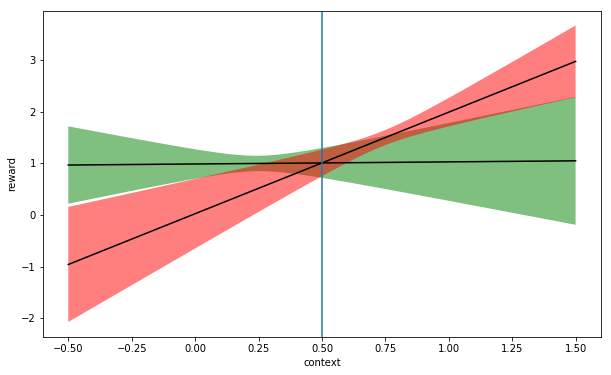

In [11]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')
plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')
plt.axvline(x = 0.5)
plt.xlabel('context')
plt.ylabel('reward')

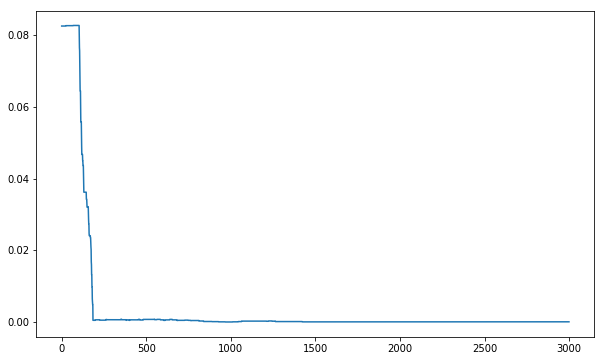

In [12]:
#Plot regret
plt.plot(smooth(regret_thr, box_pts = 200))

## Comparison of the two methods

Trade-off between convergence rate, risk, and confidence level

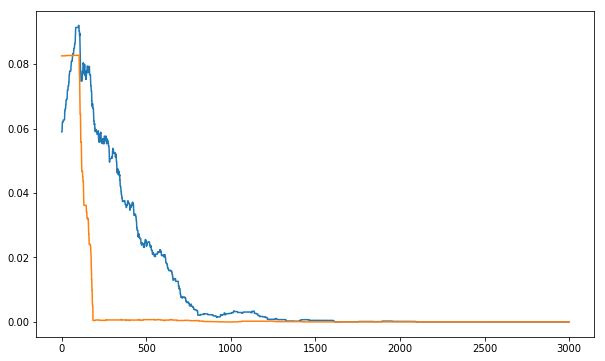

In [13]:
#Vary the confidence level, plot convergence rate, regret, risk
plt.plot(smooth(regret_ucb, box_pts = 200))
plt.plot(smooth(regret_thr, box_pts = 200))
